In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 14

In [21]:
def make_domain_diagram(E=0.1, L=1.0):
    """Quick plotting code for a domain diagram
    """
    
    # Make figure
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    ax.set_xlim([0, 1])
    ax.set_ylim([0, L])
    
    # Add labels
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.xaxis.set_ticks([0])
    ax.yaxis.set_ticks([0, L])
    ax.yaxis.set_ticklabels([0, 'L'])
    ax.tick_params(direction='out', pad=8)
    
    # Add coastline ticks
    for tick in np.arange(0, 1, 0.01):
        ax.plot([tick, tick+0.01], [0, -0.02], 'k-', clip_on=False)
    
    return fig, ax

In [68]:
# Define constants
f = 1e-4
g = 9.81

### Arrested topographic wave

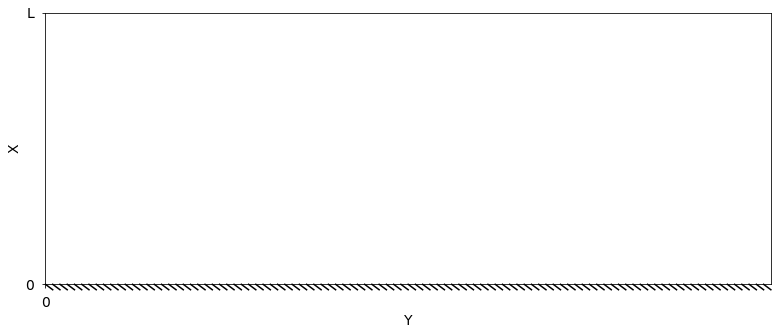

In [22]:
fig, ax = make_domain_diagram()

$\require{cancel}$
Start with steady shallow water equations

$$
\begin{align}
- fv & = -g\frac{\partial\eta}{\partial x} \tag{1a} \\
fu & = -g\frac{\partial\eta}{\partial y} + \frac{\tau_y}{h} - \frac{\mu v}{h} \tag{1b} \\
0 & = \frac{\partial hu}{\partial x} + \frac{\partial hv}{\partial y} \tag{1c}
\end{align}
$$

Vorticity equation

$$fh\left(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\right) = -\frac{\partial h}{\partial x}\left[\frac{\tau_y}{h} + \frac{\mu g}{f}\left(\frac{1}{h_x}\frac{\partial^2\eta}{\partial x^2} - \frac{1}{h}\frac{\partial\eta}{\partial x}\right)\right] \tag{2}$$

Sub continuity equation

$$fu = \frac{\tau_y}{h} + \frac{\mu g}{f}\left(\frac{1}{h_x}\frac{\partial^2\eta}{\partial x^2} - \frac{1}{h}\frac{\partial\eta}{\partial x}\right) \tag{3}$$

Sub (1b) to produce ATW equation

$$\boxed{\hspace{0.5cm} \frac{\partial^2\eta}{\partial x^2} + \frac{f}{\mu}\frac{\partial h}{\partial x}\frac{\partial\eta}{\partial y} = 0 \hspace{0.5cm}} \tag{4}$$

Linearize by letting $\frac{\partial h}{\partial x} = s$

$$\frac{\partial^2\eta}{\partial x^2} + \frac{fs}{\mu}\frac{\partial\eta}{\partial y} = 0 \tag{5}$$

#### Case 1: Windstress boundary condition

$$
\begin{align}
\frac{\partial\eta}{\partial x}(0, y) & = \frac{f\tau_y}{\mu g} & \text{(windstress at coast)} \tag{6a}\\
\eta(L, y) = \eta(x, 0) & = 0 & \text{(shelf and upstream)} \tag{6b}
\end{align}
$$

Consider steady and transient solutions

$$\eta(x, y) = \bar{\eta}(x) + \hat{\eta}(x, y) \tag{7}$$

Where $\bar{\eta}(x)$ is the linear height between $x=0$ and $x=L$ at large $y$ (from Farlow 1982, p. 46)

$$\bar{\eta}(x) = \frac{f\tau_y}{\mu g}\left(x - L\right) \tag{8}$$

and the transient solution is the solution to (5) with homogeneous boundary conditions

$$\hat{\eta}(x, y) = \sum_{n=1}^{\infty}A_n\exp\left({\frac{\mu}{fs}\frac{n\pi y}{L}}\right)\sin\left(\frac{n\pi x}{L}\right) \tag{9}$$

Considering the $y$ "boundary" condition, the coefficients $A_n$ are given by

$$
\begin{align}
A_n & = -\frac{2f\tau_y}{\mu gL}\left[\int_0^Lx\sin\left(\frac{n\pi x}{L}\right)dx - L\int_0^L\sin\left(\frac{n\pi x}{L}\right)dx\right] \\
& = -\frac{2f\tau_y}{n\pi\mu g}\left[\frac{L}{n\pi}\sin\left(\frac{n\pi x}{L}\right) - \left(x - L\right)\cos\left(\frac{n\pi x}{L}\right)\right]_0^L \\
& = \frac{2f\tau_y\left(x - L\right)}{\pi\mu g}\frac{(-1)^n - 1}{n} \tag{10}
\end{align}
$$

The full solution is thus

$$\eta(x, y) = \frac{f\tau_y}{\mu g}\left(x - L\right)\left[1 + \frac{2}{\pi}\sum_{n=1}^{\infty}\frac{(-1)^n - 1}{n}\exp\left({\frac{\mu}{fs}\frac{n\pi y}{L}}\right)\sin\left(\frac{n\pi x}{L}\right)\right] \tag{11}$$

In [95]:
# ATW Case 1: Wind forcing at coast
mu = 1
tau_y = 1
L = 1e5
s = 10
N = 500
xi = np.arange(0, L, 1e3)
yi = np.arange(-2e2, 0, 1e0)
x, y = np.meshgrid(xi, yi)

eta_hat = 0
for n in range(1, N):
    eta_hat = eta_hat + (-1)**n - 1 / n * np.exp(mu / (f * s) * n * np.pi * y / L) * np.sin(n * np.pi * x / L)

eta = f * tau_y / (mu * g) * (x - L) * (1 + 2 / np.pi * eta_hat)

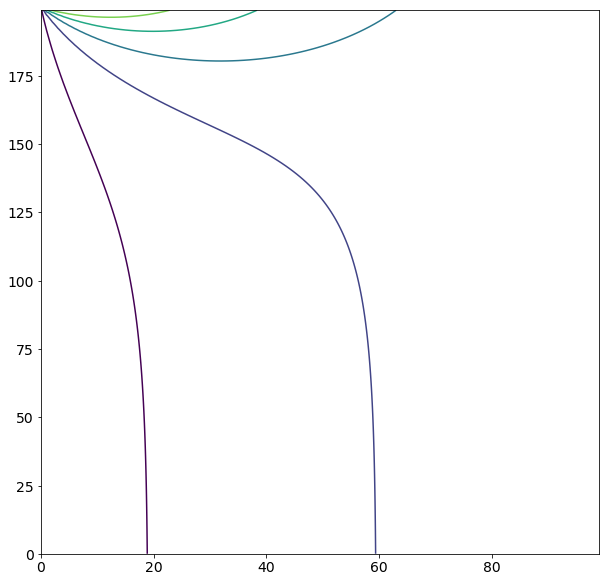

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.contour(eta)

#### Case 2: Offshore surface height slope condition

$$
\begin{align}
\frac{\partial\eta}{\partial x} & = 0 & \text{at } x = 0 \text{ (coast)} \tag{7a} \\
\frac{\partial\eta}{\partial y} & = \gamma & \text{at } x = L \text{ (shelf)} \tag{7b} \\
\eta & = 0 & \text{at } y > 0 \text{ (upstream)} \tag{7c}
\end{align}
$$

The offshore boundary condition (7b) cannot be accomodated by separation of variables and a Laplace transform must be used (more specifically, Duhamel's Principle). The solution as given by Csanady 1978 is

$$\eta = \gamma y - \frac{\gamma\left(x^2 - L^2\right)}{2} - \frac{16\gamma L^2}{k\pi^3}\sum_{n=0}^\infty\frac{(-1)^n}{(2n + 1)^3}\exp\left[\frac{(2n + 1)^2\pi^2y}{4L^2}\right]\cos\left[\frac{(2n + 1)\pi x}{2L}\right] \tag{8}$$

which for large $y$ reduces to

$$\eta = \gamma y - \frac{\gamma\left(x^2 - L^2\right)}{2} \tag{9}$$

The offshore sea surface height boundary presents an interesting idea for the adapting the model from Susan's 1996 paper.

### Linear time dependence model

From Susan's paper, the time dependent SWE's with $\eta = \eta_1ft + \eta_0$ give

$$R^2\nabla^2\eta_1 - \eta_1 = \frac{q}{f} \tag{13}$$

The solution is the sum of homogeneous and particular solutions

$$\eta_1 = \phi + \bar{\eta}_1(x) \tag{14} $$

And the homogenous equation is a Helmholz equation

$$\nabla^2\phi - \frac{1}{R^2}\phi = 0 \tag{15}$$

This time orient the coastline in the $y$ direction with a wall boundary at the north end ($y=0$).

Boundary conditions are

$$
\begin{align}
\phi(x, 0) & = \bar{\eta}_1(0) - \bar{\eta}_1(x) & \text{($\phi$ constant along walls)} \tag{16a} \\
\frac{\partial\phi}{\partial y}(x, 0) & = \phi(0, y) = 0 & \text{($\phi$ constant along walls)} \tag{16b} \\
\phi(S, y) & = f(y) & \text{($\phi$ slope at ocean boundary)} \tag{16c} \\
\end{align}
$$

#### Laplace transform

Take the Laplace transform of (13) from $y \to \xi$

$$\mathcal{L}\left\{\frac{\partial^2\phi}{\partial x^2}\right\} + \mathcal{L}\left\{\frac{\partial^2\phi}{\partial y^2}\right\} - \frac{1}{R^2}\mathcal{L}\left\{\phi\right\} = 0 \tag{15}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2}(x, \xi) + \xi^2\hat{\phi}(x, \xi) - \xi\underbrace{\left[\bar{\eta}_1(0) - \bar{\eta}_1(x)\right]}_{\text{(14a)}} - \underbrace{\cancel{\frac{\partial\phi}{\partial y}(x, 0)}}_{\text{(14b)}} - \frac{1}{R^2}\hat{\phi}(x, \xi) = 0 \tag{16}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2}(x, \xi) + \mu^2\hat{\phi}(x, \xi) = g(x) \tag{17}$$

where

$$
\begin{align}
\mu^2 & = \xi^2 - \frac{1}{R^2}, \hspace{0.5cm} \xi > \frac{1}{R} \tag{18a} \\
g(x) & = \xi\left[\bar{\eta}_1(0) - \bar{\eta}_1(x)\right] \tag{18b}
\end{align}
$$

$$\hat{\phi}(x, \xi) = \underbrace{\cancel{c_1}}_{\text{14b}}\cos(\mu x) + \underbrace{\frac{F(\xi)}{\sin(\mu S)}}_{\text{14c}}\sin(\mu x) + \underbrace{\frac{1}{\mu^2}g(x)}_{\hat{\phi}_P} \tag{19}$$

This equation is solvable, but finding inverse Laplace transforms for sines and cosines is difficult

#### Fourier transform solution

Take the Fourier transform of (13) from $y \to \xi$

$$\mathcal{F}\left\{\frac{\partial^2\phi}{\partial x^2}\right\} + \mathcal{F}\left\{\frac{\partial^2\phi}{\partial y^2}\right\} - \frac{1}{R^2}\mathcal{F}\left\{\phi\right\} = 0 \tag{20}$$

$$\frac{\partial^2\hat{\phi}}{\partial x^2} - \left(\xi^2 + \frac{1}{R^2}\right)\hat{\phi} = 0 \tag{21}$$

which has solution

$$\hat{\phi} = c_1\cosh\left[\left(\xi^2 + \frac{1}{R^2}\right)^{\frac{1}{2}}x\right] + c_2\sinh\left[\left(\xi^2 + \frac{1}{R^2}\right)^{\frac{1}{2}}x\right] \tag{22}$$